In [2]:
# Importing required Packages
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image 


In [3]:
# Read Loan Dataset
df = pd.read_csv("train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Feature Engineering

### Create a new feature : Total_Income = Applicant Income + Coapplicant Income

In [5]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [6]:
del df['ApplicantIncome']
del df['CoapplicantIncome']

### Create a new feature : Loan Amount to Total Income

In [9]:
df['LTI'] = df['LoanAmount']* 100 /df['Total_Income']

In [10]:
df['LTI'].describe()

count    597.000000
mean       2.375496
std        0.828771
min        0.252292
25%        1.932232
50%        2.419984
75%        2.816272
max        8.271164
Name: LTI, dtype: float64

### Create a new feature : Income group by binning Total income <br>

**Condition :** <br>
<li>If total income is less than 5000 -------------------------> Low Income group <br>
<li>If total income is more than 5000 but less than 10000 -----> Medium Income group <br>
<li>If total income is more than 10000 ------------------------> High Income group

In [23]:
def income_group(pi):
    if pi < 5000 : group = "Low Income group"
    elif (pi >= 5000) & (pi<10000) : group = "Medium Income group"
    else: group = "High Income group"
    
    return group
  

In [24]:
df['Income_group'] = df['Total_Income'].apply(income_group)

In [25]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,LTI,Income_group
0,LP001002,Male,No,0,Graduate,No,NaN,360.0,1.0,Urban,Y,5849.0,NaN,Medium Income group
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0,2.101461,Medium Income group
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0,2.200000,Low Income group
3,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0,2.428658,Low Income group
4,LP001008,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0,2.350000,Medium Income group


### Create a new feature : Stable group by using Multiple columns <br>

**Condition :** <br>
<li>If a applicant is married,graduate and not self employed ----> Stable <br>
<li> Else  ---------------------------------------------------------------> Unstable 

In [27]:
def stable_group(row):
    if (row['Married'] == "Yes") & (row['Education'] == 'Graduate') & (row['Self_Employed']=='No'):
        group = 'Stable_group'
    else : group = "Unstable_group"
    
    return group
    

In [29]:
df['Stable_group'] = df.apply(stable_group,axis=1)

In [30]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,LTI,Income_group,Stable_group
0,LP001002,Male,No,0,Graduate,No,NaN,360.0,1.0,Urban,Y,5849.0,NaN,Medium Income group,Unstable_group
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0,2.101461,Medium Income group,Stable_group
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0,2.200000,Low Income group,Unstable_group
3,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0,2.428658,Low Income group,Unstable_group
4,LP001008,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0,2.350000,Medium Income group,Unstable_group


### Load data and assign it to a variable called drinks.


In [31]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'

In [32]:
drinks = pd.read_csv(url)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [33]:
drinks['continent'].value_counts()

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

## Group By

A groupby operation involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations on these groups.

### Which continent drinks more beer on average?

In [36]:
drinks.groupby('continent').agg({'beer_servings':'mean','wine_servings':'max'})

,beer_servings,wine_servings
continent,,
AF,61.471698,233
AS,37.045455,123
EU,193.777778,370
OC,89.687500,212
SA,175.083333,221


In [35]:
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


### Which continent drinks minimum wine ?

In [37]:
drinks.groupby('continent').agg({'wine_servings':'min'})

,wine_servings
continent,
AF,0
AS,0
EU,0
OC,0
SA,1


### Which continent drinks max alcohol ?

In [38]:
drinks.groupby('continent').agg({'total_litres_of_pure_alcohol':'max'})

,total_litres_of_pure_alcohol
continent,
AF,9.1
AS,11.5
EU,14.4
OC,10.4
SA,8.3


### Exercise

In [39]:
users = pd.read_table('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', 
                      sep='|', index_col='user_id')
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


### In each Occupation ,what is the average age ?

In [40]:
users.groupby('occupation').agg({'age':'mean'})

,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


### In each gender ,what is the min age ?

In [41]:
users.groupby('gender').agg({'age':'min'})

,age
gender,
F,13
M,7


### For each combination of occupation and gender, calculate the mean age ? 

In [42]:
users.groupby(['occupation','gender']).agg({'age':'mean'})

age
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

## Join two dataframes 

### Using Concatenate function

In [43]:
Div_1 = pd.DataFrame({
        'roll_no': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']})


Div_2 = pd.DataFrame({
        'roll_no': ['6', '7', '8', '9', '10'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']})

In [44]:
Div_1

,roll_no,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches


In [45]:
Div_2

,roll_no,first_name,last_name
0,6,Billy,Bonder
1,7,Brian,Black
2,8,Bran,Balwner
3,9,Bryce,Brice
4,10,Betty,Btisan


#### Join both the tables on top of each other

In [71]:
df = pd.concat([Div_1,Div_2],axis=0)
df = df.reset_index(drop=True)
df

,roll_no,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
5,6,Billy,Bonder
6,7,Brian,Black
7,8,Bran,Balwner
8,9,Bryce,Brice
9,10,Betty,Btisan


### New Data

In [53]:
English = pd.DataFrame({
        'roll_no': ['2', '1', '3', '4', '5','6'],
         'name': ['Amy', 'Alex', 'Allen', 'Alice', 'Ayoung','Rahul'], 
        'english': [56,78,65,89,94,88]})


Maths = pd.DataFrame({
        'roll_no': ['1', '2', '3', '4', '5','7'],
         'name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung','Ganesh'], 
        'maths': [65,26,78,59,75,87]})

In [54]:
English


,roll_no,name,english
0,2,Amy,56
1,1,Alex,78
2,3,Allen,65
3,4,Alice,89
4,5,Ayoung,94
5,6,Rahul,88


In [55]:
Maths

,roll_no,name,maths
0,1,Alex,65
1,2,Amy,26
2,3,Allen,78
3,4,Alice,59
4,5,Ayoung,75
5,7,Ganesh,87


#### Join both the subjects marks

In [56]:
pd.concat([English,Maths],axis=1)

,roll_no,name,english,roll_no,name,maths
0,2,Amy,56,1,Alex,65
1,1,Alex,78,2,Amy,26
2,3,Allen,65,3,Allen,78
3,4,Alice,89,4,Alice,59
4,5,Ayoung,94,5,Ayoung,75
5,6,Rahul,88,7,Ganesh,87


## Merge


### Inputs Parameters<br><br>

<li><b>Left dataframe :</b> 1st Dataframe <br>
<li><b>Right dataframe :</b> 2nd Dataframe <br>
<li><b>on :</b> Primary key<br>
<li><b>how :</b> inner/outer/left/right<br>

In [65]:
df = pd.merge(English,Maths,on=['roll_no','name'],how='outer')
df

,roll_no,name,english,maths
0,2,Amy,56.0,26.0
1,1,Alex,78.0,65.0
2,3,Allen,65.0,78.0
3,4,Alice,89.0,59.0
4,5,Ayoung,94.0,75.0
5,6,Rahul,88.0,NaN
6,7,Ganesh,NaN,87.0


In [66]:
df.sort_values(by='roll_no')

,roll_no,name,english,maths
1,1,Alex,78.0,65.0
0,2,Amy,56.0,26.0
2,3,Allen,65.0,78.0
3,4,Alice,89.0,59.0
4,5,Ayoung,94.0,75.0
5,6,Rahul,88.0,NaN
6,7,Ganesh,NaN,87.0


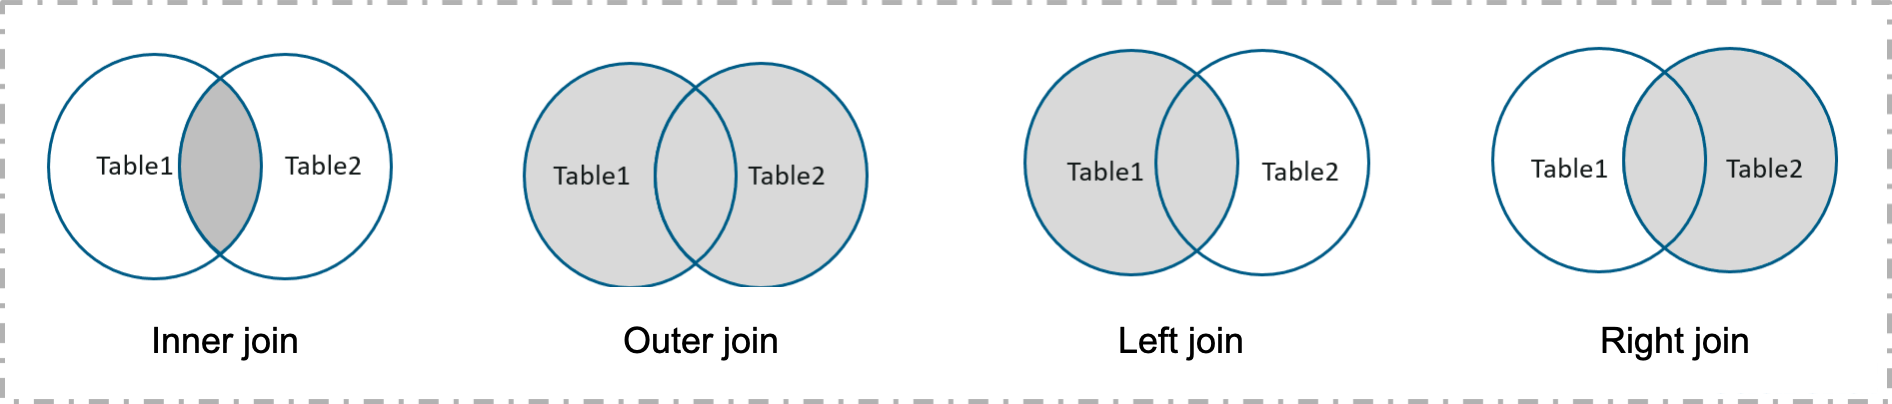

In [59]:
Image('joins.png')